In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Note, my EDA is still a work in progress and I will be improving the data set later as I discover more insights

In [9]:
# Read in my raw scraped data
df = pd.read_csv("yoyo_raw_data.csv")

In [10]:
# I'm dropping the url because it doesn't matter for the analysis
df = df.drop('url', axis=1)

In [11]:
# Changing Price and weight to numbers
df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(' ', ''))
df['weight'] = pd.to_numeric(df['weight'].str.replace('grams', '').str.replace(' ', '').str.replace('g',''))

C:\Users\kaden\AppData\Local\Temp\ipykernel_15512\2318031119.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(' ', ''))


In [12]:
# Split 'brand' column into 'brand' and 'description' columns
df[['brand', 'description']] = df['brand'].str.split(' - ', 1, expand=True)

# Remove leading and trailing whitespace
df['brand'] = df['brand'].str.strip()
df['description'] = df['description'].str.strip()


C:\Users\kaden\AppData\Local\Temp\ipykernel_15512\4116986239.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['brand', 'description']] = df['brand'].str.split(' - ', 1, expand=True)


In [13]:
# Change date to date format
df['released'] = pd.to_datetime(df['released'])

In [14]:
# Looking at the 3 most expensive yoyo's
df.sort_values(by="price", ascending=False).head(3)

,name,price,brand,diameter,width,gap width,weight,bearing size,response,material,designed in,made in,machined in,released,description
465,Anglam Zero Apogee,969.99,sOMEThING,55.21 mm / 2.17 inches,42.81 mm / 1.67 inches,4.62 mm / 0.18 inches,65.5,Size C (.250 x .500 x .187),sOMEThING Pads,Titanium w/ Stainless Steel,Japan,China,NaN,2021-05-01,Titanium/Steel Anglam design!
463,Anglam Zero,699.99,sOMEThING,55.21 mm / 2.17 inches,42.38 mm / 1.67 inches,4.62 mm / 0.18 inches,65.6,Size C (.250 x .500 x .187),sOMEThING Pads,Titanium,Japan,China,NaN,2021-05-01,Titanium Anglam!
6,Full Metal Damascus,625.00,ENSO,56.79 mm / 2.24 inches,43.48 mm / 1.71 inches,4.69 mm / 0.18 inches,64.1,Size C (.250 x .500 x .187),"""Slim Pad"" Size 19mm OD",Titanium w/ EngravedDamascus Steel Rims,USA,China,NaN,2023-07-01,High Performance Titanium x Damascus Steel Rim...


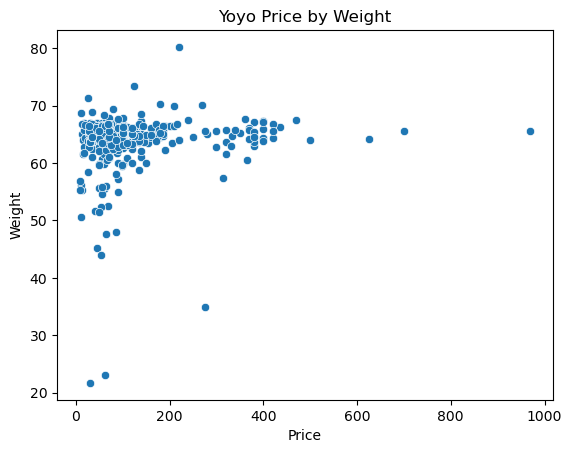

In [15]:
# Price by weight
sns.scatterplot(x='price', y='weight', data=df)
plt.xlabel('Price')
plt.ylabel('Weight')
plt.title('Yoyo Price by Weight')
plt.show()